In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("weather_hcm_daily.csv")
data.head()

name           address        resolvedAddress  latitude  \
0  Hồ Chí Minh city  Hồ Chí Minh city  Hồ Chí Minh, Việt Nam    10.776   
1  Hồ Chí Minh city  Hồ Chí Minh city  Hồ Chí Minh, Việt Nam    10.776   
2  Hồ Chí Minh city  Hồ Chí Minh city  Hồ Chí Minh, Việt Nam    10.776   
3  Hồ Chí Minh city  Hồ Chí Minh city  Hồ Chí Minh, Việt Nam    10.776   
4  Hồ Chí Minh city  Hồ Chí Minh city  Hồ Chí Minh, Việt Nam    10.776   

   longitude    datetime  tempmax  tempmin  temp  feelslikemax  ...  \
0    106.701  2015-01-01     31.0     23.0  26.6          31.4  ...   
1    106.701  2015-01-02     30.0     20.0  25.0          30.4  ...   
2    106.701  2015-01-03     32.0     23.0  26.8          33.5  ...   
3    106.701  2015-01-04     32.0     24.0  27.1          34.8  ...   
4    106.701  2015-01-05     30.6     24.9  26.7          33.2  ...   

   solarenergy  uvindex  severerisk              sunrise               sunset  \
0         19.9        8         NaN  2015-01-01T06:11:22  2015-01-01T17:41:39   
1         16.1        7         NaN  2015-01-02T06:11:46  2015-01-02T17:42:12   
2         16.0        8         NaN  2015-01-03T06:12:09  2015-01-03T17:42:44   
3         10.9        4         NaN  2015-01-04T06:12:32  2015-01-04T17:43:17   
4         14.1        8         NaN  2015-01-05T06:12:54  2015-01-05T17:43:50   

   moonphase              conditions  \
0       0.36        Partially cloudy   
1       0.39        Partially cloudy   
2       0.43  Rain, Partially cloudy   
3       0.46        Partially cloudy   
4       0.50  Rain, Partially cloudy   

                                         description               icon  \
0                  Partly cloudy throughout the day.  partly-cloudy-day   
1                  Partly cloudy throughout the day.  partly-cloudy-day   
2  Partly cloudy throughout the day with rain in ...               rain   
3                  Partly cloudy throughout the day.  partly-cloudy-day   
4  Partly cloudy throughout the day with morning ...               rain   

   source  
0     obs  
1     obs  
2     obs  
3     obs  
4     obs  

[5 rows x 38 columns]

In [12]:
unique_val = data['source'].unique()
print(unique_val)

['obs']


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3927 non-null   object 
 1   address           3927 non-null   object 
 2   resolvedAddress   3927 non-null   object 
 3   latitude          3927 non-null   float64
 4   longitude         3927 non-null   float64
 5   datetime          3927 non-null   object 
 6   tempmax           3927 non-null   float64
 7   tempmin           3927 non-null   float64
 8   temp              3927 non-null   float64
 9   feelslikemax      3927 non-null   float64
 10  feelslikemin      3927 non-null   float64
 11  feelslike         3927 non-null   float64
 12  dew               3927 non-null   float64
 13  humidity          3927 non-null   float64
 14  precip            3927 non-null   float64
 15  precipprob        3927 non-null   int64  
 16  precipcover       3927 non-null   float64


In [15]:
# Drop unnecessary columns
df_dropped = data.drop(labels=['name', 'address', 'resolvedAddress', 'latitude', 'longitude','source'], axis=1)

In [20]:
df_dropped['datetime'] = pd.to_datetime(df_dropped['datetime'])

In [21]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          3927 non-null   datetime64[ns]
 1   tempmax           3927 non-null   float64       
 2   tempmin           3927 non-null   float64       
 3   temp              3927 non-null   float64       
 4   feelslikemax      3927 non-null   float64       
 5   feelslikemin      3927 non-null   float64       
 6   feelslike         3927 non-null   float64       
 7   dew               3927 non-null   float64       
 8   humidity          3927 non-null   float64       
 9   precip            3927 non-null   float64       
 10  precipprob        3927 non-null   int64         
 11  precipcover       3927 non-null   float64       
 12  preciptype        3003 non-null   object        
 13  windgust          3927 non-null   float64       
 14  windspeed         3927 n

In [17]:
df_dropped.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'windgust', 'windspeed', 'windspeedmax',
       'windspeedmean', 'windspeedmin', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon'],
      dtype='object')

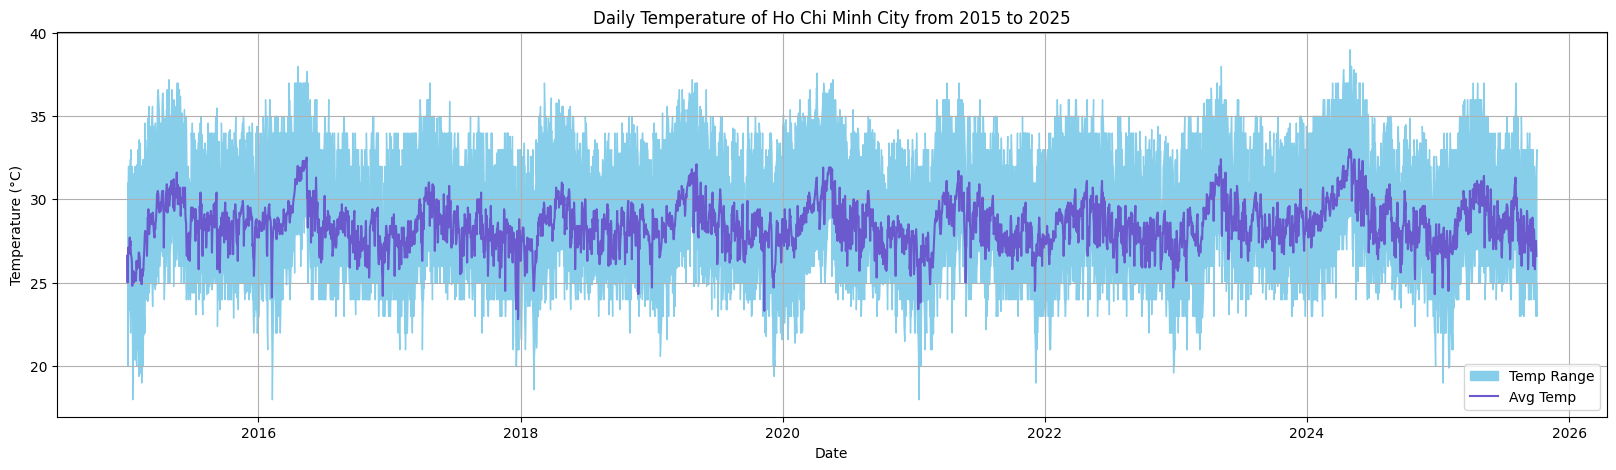

In [30]:
plt.figure(figsize=(20, 5))
plt.fill_between(df_dropped['datetime'], df_dropped['tempmax'], df_dropped['tempmin'], color='skyblue', label='Temp Range')
plt.plot(df_dropped['datetime'], df_dropped['temp'], color='Slateblue', label='Avg Temp')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature of Ho Chi Minh City from 2015 to 2025')
plt.legend()
plt.grid(True)
plt.show()